### Potencia las Ventas con IA: Clustering, Predicción, sistemas de recomendaciones y AI generativa para construir un asistente de venta de consumo mayorista.

<p align="center">Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones.</p>
<p align="center">Facultad de Matemática, Astronomía, Física y Computación (UNC).</p>


#### Integrantes

- María Guadalupe Serra

- Dámaso José Solinas

- María Emilia Briggiler

- Iván Gabriel Bainotti


---

Este proyecto se basa en un conjunto de datos transaccionales que registra ventas de productos alimenticios en el canal mayorista, realizadas a distintos puntos de venta (PDV) que operan como clientes del sistema. El propósito es aplicar técnicas de ciencia de datos para identificar patrones comerciales, optimizar decisiones estratégicas y generar valor a partir del análisis del comportamiento de compra.

### Práctico 1 – Análisis y Visualización de Datos

**🎯 Objetivos**
1. Explorar y comprender el conjunto de datos.

2. Analizar variables clave para el análisis comercial como: ventas, fechas, productos, puntos de venta,
clientes.

3. Visualizar tendencias, estacionalidades, patrones de comportamiento y posibles anomalías.

### 📚 Índice

1. [🔍 Exploración inicial del conjunto de datos](#-1-exploración-inicial-del-conjunto-de-datos)    
    - [🔧 1.1 Revisión de datos faltantes](#11-revisión-de-datos-faltantes)  
    - [📊 1.2 Exploración de variables relevantes](#-12-exploración-de-variables-relevantes)  
        - [🧑‍💼 Clientes](#clientes)  
        - [📦 Productos](#productos)  
        - [🧾 Facturas](#facturas)  
        - [📅 Fechas](#fechas)  

2. [📈 Análisis y visualización de variables clave](#2-análisis-y-visualización-de-variables-clave)  
    - [🏆 2.1 Productos y clientes destacados](#21-productos-y-clientes-destacados)  
    - [💲 2.2 Evolución temporal de ventas y precios](#22-evolución-temporal-de-ventas-y-precios)  
    - [📆 2.3 Tendencias y estacionalidad](#23-tendencias-y-estacionalidad)  

3. [🕒 Análisis de granularidad temporal](#3-análisis-de-granularidad-temporal)  

4. [💡 Observaciones para la limpieza y curación de datos](#4-hallazgos-y-observaciones-relevantes)


#### Librerías

In [48]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [49]:
sns.set_theme()

### 🔍 1. Exploración inicial del conjunto de datos

🎯  **Objetivos**:
- Explorar la estructura del dataset, columnas, tipos, valores faltantes.

- Identificar variables relevantes al análisis comercial.

In [50]:
url = "https://raw.githubusercontent.com/Mentoria-M11-g1/practico_1_eda/main/data/sales_data.parquet"
df_data = pd.read_parquet(url)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310217 entries, 0 to 310216
Data columns (total 52 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   factu_codi            310217 non-null  object        
 1   factu_nume            310217 non-null  int64         
 2   sucur                 310217 non-null  int64         
 3   fecha                 310217 non-null  datetime64[ns]
 4   cliente               310217 non-null  int64         
 5   total                 310217 non-null  float64       
 6   iva1                  310217 non-null  float64       
 7   lista_precios         310217 non-null  int64         
 8   condi_venta           310217 non-null  object        
 9   usua                  310066 non-null  float64       
 10  pedi_codi             310066 non-null  object        
 11  pedi_nume             310066 non-null  float64       
 12  pedi_sucur            310066 non-null  float64       
 13 

In [51]:
df_data.shape

(310217, 52)

- El dataset tiene 310217 filas y 52 columnas.

In [52]:
df_data.head()

,factu_codi,factu_nume,sucur,fecha,cliente,total,iva1,lista_precios,condi_venta,usua,...,impor_grava,uni_medi,conver,canti_venta,boni_impor_ori,iva_percep_impor_ori,boni_porcen_precio,boni_impor_precio,precio_uni_neto,precio_total
0,fca9,16092,9,2022-01-17,4627,2611.29,453.2,2,00,24.0,...,1.433000e+09,un,1000000,2000000,0.0,0.0,0,0,716500000.0,1.733930e+09
1,fca9,16092,9,2022-01-17,4627,2611.29,453.2,2,00,24.0,...,1.433000e+09,un,1000000,100000000,0.0,0.0,0,0,14330000.0,1.733930e+09
2,fca9,16092,9,2022-01-17,4627,2611.29,453.2,2,00,24.0,...,3.297400e+08,un,1000000,6000000,0.0,0.0,8000000,28672800,54956100.0,3.989900e+08
3,fca9,16092,9,2022-01-17,4627,2611.29,453.2,2,00,24.0,...,1.857800e+08,un,1000000,6000000,0.0,0.0,9999900,20641800,30963000.0,2.247900e+08
4,fca9,16092,9,2022-01-17,4627,2611.29,453.2,2,00,24.0,...,2.763100e+08,di,3000000,3000000,0.0,0.0,10000000,30701400,92103800.0,3.343400e+08


- Cada registro de la base de datos representa un **ítem** de producto dentro de una factura emitida a un cliente.
Los cuales tienen la siguiente información relevante para el análisis comercial.

| Categoría               | Columna           | Tipo       | Descripción                                                  | Observaciones                                                                 |
|------------------------|-------------------|------------|--------------------------------------------------------------|--------------------------------------------------------------------------------|
| Facturación            | factu_codi        | categórica | Código de la factura                                         | 9 tipos de códigos distintos                                                   |
| Facturación            | factu_nume        | numérica   | Número de facturación                                        | Identificación única de la factura                                             |
| Facturación            | sucur             | numérica   | Sucursal de la venta                                         | Codifica las sucursales en 1, 9 y 12                                           |
| Facturación            | fecha             | fecha      | Fecha de realización de la venta                             |                                                                                 |
| Facturación            | canti             | numérica   | Cantidad de unidades individuales vendidas                   | `canti = canti_venta * conver`                                                 |
| Facturación            | canti_venta       | numérica   | Cantidad de productos vendidos                               | Se cuenta como 1 producto si trae varias unidades                              |
| Facturación            | descrip           | texto      | Descripción del producto                                     | Texto libre, requiere limpieza/estandarización                                |
| Facturación            | total             | numérica   | Importe total de la factura                                  | Repetido por ítem, escala desconocida                              |
| Facturación            | iva1              | numérica   | IVA sobre `impor_gravado`                                    | Repetido por ítem, escala desconocida                              |
| Facturación            | impor_gravado     | numérica   | Total productos sin IVA (por factura)                        | `impor_gravado + iva1 = total`                                                |
| Facturación (por ítem) | precio_total      | numérica   | Precio total de la fila (con IVA)                            | `impor_grava + iva1_impor + iva_percep_impor`                                 |
| Facturación (por ítem) | precio_uni        | numérica   | Precio por unidad                                            | Precio por producto                                                            |
| Facturación (por ítem) | precio_uni_neto   | numérica   | Precio unitario sin IVA                                      | Precio por producto                                                            |
| Facturación (por ítem) | impor_grava       | numérica   | Total productos sin IVA (por ítem)                           | `canti_venta * precio_uni_neto`                                               |
| Facturación (por ítem) | iva1_impor        | numérica   | IVA sobre `impor_grava`                                      | `impor_grava + iva1_impor = precio_total`                                     |
| Cliente                | cliente           | numérica   | Código de cliente                                            | Identificación única de cliente                                               |
| Cliente                | nombre            | texto      | Nombre del cliente                                           |                                                                                 |
| Cliente                | cuit              | numérica   | CUIT del cliente                                             |                                                                                 |
| Fechas                 | entre_fecha       | fecha      | Fecha de entrega                                             |                                                                                 |
| Fechas                 | fecha_alta        | fecha      | Fecha de alta                                                |                                                                                 |
| Fechas                 | fecha_regis       | fecha      | Fecha de registro                                            | Habitualmente un día antes o igual a la fecha de entrega                      |
| Producto               | lista_precios     | numérica   | Catálogo de precios                                          | Define los precios unitarios                                                  |
| Producto               | produc            | texto      | Código numérico del producto                                 |                                                                                 |
| Producto               | uni_medi          | texto      | Unidad de medida de la venta                                 | UN: unidad, DI: caja/bolsa, BU: paquete/bulto                                                 |


🔍 A partir de la exploración inicial de las columnas, se identificaron algunas que no aportan información relevante para los objetivos del análisis. Muchas de ellas presentan muy poca variabilidad, correspondientes a un único valor, o contienen datos administrativos sin utilidad para el estudio. Por este motivo, no serán consideradas en la análisis principal.

In [53]:
columns_to_drop = [
    'factu_codi',       # Código de factura, no relevante
    'usua',             # Desconocido, 89% de valores es 34 y 11% es 24
    'pedi_codi',        # Código de pedido: pedi, pedim, pedie, no relevante
    'factu_letra',      # Letra de la factura, no relevante
    'iva_cate',         # categoría del IVA, no relevante
    'iva_percep',       # IVA desconocido, 95% de valores son 0.0
    'impre_marca',      # Desconocido, 92% de valores es 1, 7% es 2
    'conver_alter',     # Conversión alternativa, no relevante
    'host_name_alta',   # Parece info relativa al sistema, no relevante
    'estado_talon',     # Estado del talonario, no relevante
    'origen_pedido',    # codificación del origen del pedido, 89% de valores es a.
    'linea_nume'        # Identificador del dispositivo con el que se registro la venta
]

filtered_df = df_data.drop(columns=columns_to_drop)
filtered_df.shape

(310217, 40)

🔍 **Observaciones**

- A partir de la observación inicial, se detectó que muchas columnas numéricas, especialmente las relacionadas con precios y cantidades, presentan valores que no se corresponden con rangos posibles, sino que están escalados.

- Comparando precios unitarios (relativos a las fechas de venta) utilizando fuentes externas, se comprobó que los valores son consistentes al dividirlos por 1.000.000. Lo mismo aplica a las bonificaciones e importes de IVA, que también deben ser escalados.

- Las cantidades de productos también resultaban inverosímiles. Una vez escaladas, junto con el precio total por fila, se verifica que el importe corresponde correctamente con cantidad * precio unitario.

- Además, al analizar las descripciones de productos, se identificó que la columna `conver` representa la cantidad de unidades por paquete, y también requiere la misma escala.

✅ Por lo tanto, se decidió dividir estas columnas por 1.000.000 para obtener resultados consistentes en el análisis.

In [54]:
colums_to_scale = [
    'canti', 'precio_uni', 'boni_porcen', 'boni_impor',
    'iva1_impor', 'iva_percep_porcen', 'iva_percep_impor', 'impor_grava',
    'conver', 'canti_venta', 'boni_impor_ori', 'iva_percep_impor_ori',
    'boni_porcen_precio', 'boni_impor_precio', 'precio_uni_neto','precio_total'
]

filtered_df[colums_to_scale] = filtered_df[colums_to_scale]/ 1_000_000

#### 🔧 1.1 Revisión de datos faltantes

In [55]:
nulls = pd.DataFrame({
    'valores_faltantes': filtered_df.isnull().sum(),
    'valores_faltantes (%)': filtered_df.isnull().mean() * 100,
    'tipo': filtered_df.dtypes
}).reset_index().rename(columns={'index': 'columna'}).sort_values('valores_faltantes (%)', ascending=False)

nulls[nulls['valores_faltantes'] > 0]

,columna,valores_faltantes,valores_faltantes (%),tipo
20,depo,53587,17.274037,float64
17,orden_compra_nume,32842,10.586783,float64
11,entre_lugar,151,0.048676,float64
10,impor_gravado,151,0.048676,float64
9,pedi_sucur,151,0.048676,float64
8,pedi_nume,151,0.048676,float64
13,fecha_regis,151,0.048676,datetime64[ns]
12,entre_fecha,151,0.048676,datetime64[ns]
19,tipo_negocio,151,0.048676,float64
14,fecha_alta,151,0.048676,datetime64[ns]


<Axes: >

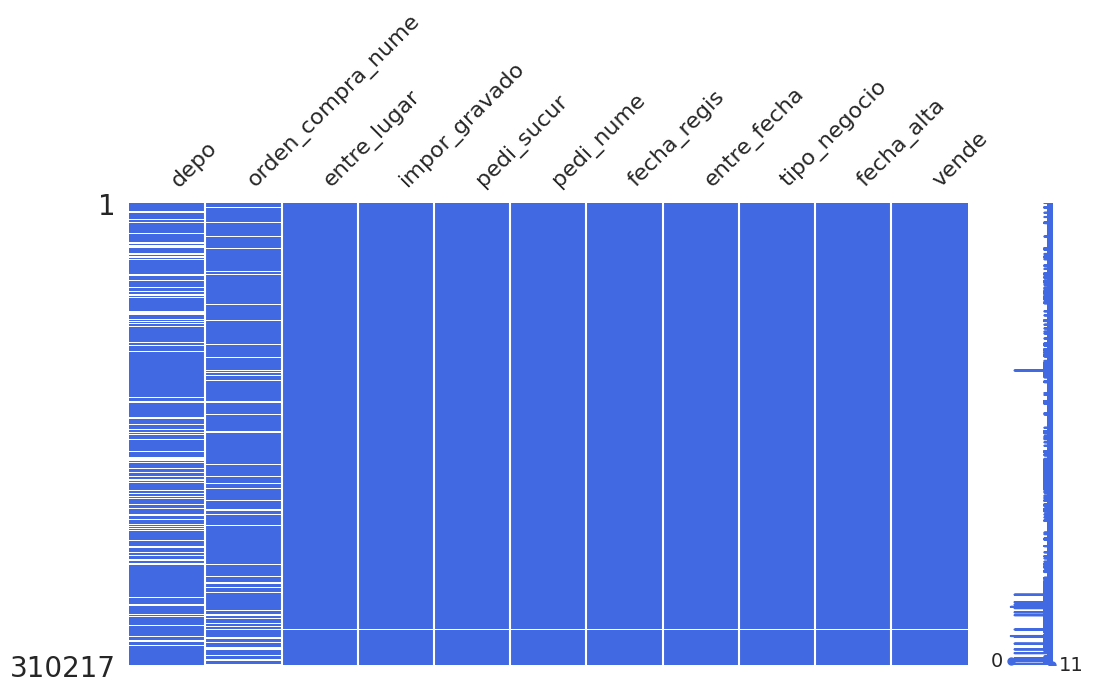

In [56]:
nulls_columns = nulls[nulls['valores_faltantes'] > 0]['columna'].tolist()
msno.matrix(filtered_df[nulls_columns], figsize=(12, 6), color=(65/255, 105/255, 225/255))

🔍 **Observaciones**

- `depo` y `orden_compra_nume` son las columnas con mayor cantidad de valores faltantes, con 17.27% y 10.59% respectivamente.

- No se observa relación directa de los valores faltantes entre las columnas.

- Para imputar estas columnas se podría analizar su relación con otras, por ejemplo:

    - `orden_compra_nume`: parece estar relacionada con `factu_nume`.

    - `depo`: parece tener una clara relación con las codificaciones de los productos.

#### 📊 1.2 Exploración de variables relevantes

🎯  **Objetivos**:
- Analizar las principales varibles del dataset —clientes, productos, facturas y fechas.

- Análisis descriptivo de las variables —clientes y facturas totales, productos distintos, etc.

- Analizar columnas redundantes.


In [57]:
# Agrupamos las columnas en grupos para facilitar el análisis
column_groups = {
    "facturacion_general": [
        "factu_nume", "sucur", "fecha", "total",
        "iva1", "impor_gravado", "cliente"
    ],
    "facturacion_por_item": [
        "factu_nume", "fecha", "produc", "descrip", "precio_uni",
        "precio_uni_neto", "boni_impor_precio",
        "canti_venta", "conver", "canti", "impor_grava",
        "iva1_impor", "iva_percep_impor", "precio_total", "total", "iva1",
        "uni_medi"
    ],
    "bonificaciones": [
        "boni_porcen", "boni_impor", "boni_impor_ori",
        "boni_porcen_precio", "boni_impor_precio"
    ],
    "iva_percepciones": [
        "iva_percep_porcen", "iva_percep_impor",
        "iva_percep_impor_ori"
    ],
    "cliente": [
        "cliente", "nombre", "cuit"
    ],
    "fechas": [
        "entre_fecha", "fecha_regis", "fecha", "fecha_alta"
    ],
    "producto": [
        "produc", "descrip", "depo",# "lista_precios"
    ],
    "pedido": [
        "pedi_nume", "pedi_sucur", "orden_compra_nume", "condi_venta"
    ],
    "logistica_venta": [
        "entre_lugar", "vende", "tipo_negocio", "depo"
    ]
}

#### 👤 Clientes

In [58]:
client_df = filtered_df[column_groups["cliente"]].drop_duplicates().reset_index(drop=True)
client_df

,cliente,nombre,cuit
0,4627,Bautista Benjamin Godoy,27-37333495-4
1,7521,Thiago Benjamin Valentino Peralta Molina,10-28728481-1
2,7925,Lorenzo Lopez,11-32678918-9
3,3187,Valentino Olivia Diaz,16-28534879-4
4,5984,Sol Delfina Ruiz Martinez,20-39935313-4
...,...,...,...
583,2939,Malena Olivera,10-38154140-3
584,4608,Valentino Acosta,29-36610828-3
585,2822,Felipe Thiago Nahuel Cabrera,10-38154140-3
586,2903,Ciro Molina,29-36610828-3


In [59]:
# Cantidad de  clientes únicos
client_count = client_df.nunique(dropna=False)
client_count

,0
cliente,571
nombre,562
cuit,494


In [60]:
# Ver personas con más de un numero de cliente
client_count = client_df.groupby(['nombre', 'cuit']).size().reset_index(name='cantidad')
client_count = client_count.sort_values(by='cantidad', ascending=False)
client_count.head(5)

,nombre,cuit,cantidad
89,Charo Benjamin Lopez,10-38154140-3,8
406,Mia Sanchez,27-33787487-5,2
196,Guillermina Franco Fernandez,23-22991561-5,2
219,Jazmin Lola Ferreyra,15-34659307-3,2
491,Sofia Thiago Valentin Rodriguez Soria,14-29602110-6,2


In [61]:
# Ver si hay numero de clientes que tengan más de un nombre asociado
client_names = client_df.groupby('cliente')['nombre'].nunique().reset_index()
client_names = client_names[client_names['nombre'] > 1].sort_values(by='nombre', ascending=False)
client_names.head(5)

,cliente,nombre
72,1887,2
90,2120,2
96,2188,2
221,4856,2
339,6558,2


🔍 **Observaciones**
- 571 clientes en total.  

- Algunas personas están asociados a más de un número de cliente, es decir, una misma persona podría estar a cargo de varios puntos de venta distintos.

- También podría ser que el `nombre` sea de una persona encargada de realizar la compra en representación del `cliente` pudiendo ser diferentes personas.

- Un mismo cliente puede tener diferentes CUIT segun la actividad que realice o si es conjunto de empresas consolidadas que representan al mismo CLIENTE pero a través de diferentes CUITS.

✅ Por ello, consideramos que la columna `cliente` es la que mejor identifica a cada **Punto de venta (PDV)**.

#### 📦 Productos

In [62]:
products_df = filtered_df[column_groups["producto"]].drop_duplicates().reset_index(drop=True)
products_df.head()

,produc,descrip,depo
0,000-999-202201370,turron arcor,NaN
1,000-000-4013,turron x 25g arcor,1.0
2,000-000-6614,pure tomate arcor x 520,1.0
3,000-000-3777,criollitas original x 100 grs.,1.0
4,000-000-10204,criollitas x 300 grs,1.0


- Se observan productos con descripciones similares que tienen códigos distintos.

In [63]:
# Cantidad de productos únicos y descripciones
products_df.nunique(dropna=False)[['produc', 'descrip']]

,0
produc,7765
descrip,3799


- Hay muchos productos con distinto código pero misma descripción.

In [64]:
# Contar cuántos códigos de producto distintos comparten la misma descripción
desc_counts = products_df.groupby('descrip')['produc'].nunique().reset_index(name='num_productos')
desc_counts = desc_counts.sort_values('num_productos', ascending=False)

# Verificar si hay productos con la misma descripción
print(f"Total de descripciones con más de un producto: {desc_counts[desc_counts['num_productos'] > 1].shape[0]}")

# Mostrar las descripciones que corresponden a más de un producto
desc_counts[desc_counts['num_productos'] > 1].head(10)

Total de descripciones con más de un producto: 906


,descrip,num_productos
3431,surt bagley,29
1745,jg pv bc multi,27
1723,jg pv bc anana,26
1744,jg pv bc manz roja,26
3441,surt diversion,25
480,block 110g,25
1694,jg pv ar manza,25
3507,tab milk,24
1695,jg pv ar multi,23
489,block 38g,23


In [65]:
# Contar cuántas descripciones únicas hay por producto
descrip_list_per_product = (
    products_df.groupby('produc')['descrip']
    .agg(lambda x: list(set(x)))
    .reset_index()
)

descrip_list_per_product['cant_descrip'] = descrip_list_per_product['descrip'].apply(len)
descrip_list_per_product['cant_descrip'].value_counts().sort_index()

# filtramos productos con más de una descripción
filtered_products = descrip_list_per_product[descrip_list_per_product['cant_descrip'] > 1]
print(f"Productos con más de una descripción: {len(filtered_products)}")

filtered_products.sort_values(by='cant_descrip', ascending=False).head(10)

Productos con más de una descripción: 44


,produc,descrip,cant_descrip
995,000-000-5312,"[cofler block 20ux 38 grs., cofler block x 38 ...",3
78,000-000-10798,"[medallon ment aguila x 15 uds., medallon ment...",2
132,000-000-11714,"[alf agru. tofi negro x 6 uds., alf. agru. tof...",2
118,000-000-11584,"[cofler aireado tofi x 70 grs., cofler airea ...",2
188,000-000-12228,"[bizcoch. brownie aguila x 425 grs., bizcoch. ...",2
189,000-000-12230,"[bizcoch. agui hum torta x 450 grs., bizcoch. ...",2
248,000-000-12576,"[choc. celofan lechec/mani x 25 grs., choc. ce...",2
259,000-000-12628,"[ceral mix vainilla/yog x 20 uds., cereal mix ...",2
289,000-000-12757,"[palito bombon 12x6x4, h. palito bombon 12x6x4]",2
332,000-000-12963,"[snack saladix cross orig. x 32 grs., snack sa...",2


- La variable `descrip` no está estandarizada, sin embargo, la mayoría de los códigos de productos se corresponden con una única descripción, excepto 44 productos. Estos productos pueden ser estandarizados manualmente.

In [66]:
# Prefijo de producto
products_df['prefijo'] = products_df['produc'].str[4:7]

# Reemplazamos los valores nulos en la columna 'depo' con 'N/A'
products_filled = products_df.fillna({'depo': 'N/A'}).copy()

# Agrupamos por prefijo y depósito
prefijo_depo_counts = (
    products_filled.groupby(['prefijo', 'depo'])
    .size()
    .reset_index(name='cantidad')
)

prefijo_depo_counts.sort_values(by='cantidad', ascending=False)

,prefijo,depo,cantidad
4,999,N/A,6666
0,000,1.0,1129
3,999,1.0,12
2,101,1.0,3
1,000,3.0,1


🔎 **Observaciones**
1. Las descripciones de los productos no estan estandarizadas.  

2. Los códigos de los productos parecen estar diferenciados por depósito, en general:
    - Prefijo `000`: depósito 1.
    - Prefijo `999`: depósito sin número (NaN).  
    
3.  Dentro de las codificaciones con prefijo 999 se encuentra el año y mes de la venta, esto produce muchos códigos únicos , y sin estandarizar.

✅ **Soluciones posibles**

1. Estandarizar las descripciones de los productos.  

2. Extraer códigos únicos por producto, y unificarlos entre depósitos.  

3. Crear un nuevo un identificador estandarizado de producto, agrupando códigos equivalentes.  

🧪 **Extras**
- Categorizar los productos para facilitar análisis por categoría comercial (por ejemplo: golosinas, galletitas, etc).

- Analizar si la codificación del producto tiene relación con su categoría o agrupa productos similares.

#### 🧾 Facturas

In [67]:
invoice_df = filtered_df[column_groups["facturacion_por_item"]].drop_duplicates().reset_index(drop=True)
invoice_df.head()

,factu_nume,fecha,produc,descrip,precio_uni,precio_uni_neto,boni_impor_precio,canti_venta,conver,canti,impor_grava,iva1_impor,iva_percep_impor,precio_total,total,iva1,uni_medi
0,16092,2022-01-17,000-999-202201370,turron arcor,716.5000,716.5000,0.0000,2.0,1.0,2.0,1433.00,300.93,0.0,1733.93,2611.29,453.2,un
1,16092,2022-01-17,000-000-4013,turron x 25g arcor,14.3300,14.3300,0.0000,100.0,1.0,100.0,1433.00,300.93,0.0,1733.93,2611.29,453.2,un
2,16092,2022-01-17,000-000-6614,pure tomate arcor x 520,59.7349,54.9561,28.6728,6.0,1.0,6.0,329.74,69.25,0.0,398.99,2611.29,453.2,un
3,16092,2022-01-17,000-000-3777,criollitas original x 100 grs.,34.4033,30.9630,20.6418,6.0,1.0,6.0,185.78,39.01,0.0,224.79,2611.29,453.2,un
4,16092,2022-01-17,000-000-10204,criollitas x 300 grs,102.3376,92.1038,30.7014,3.0,3.0,9.0,276.31,58.03,0.0,334.34,2611.29,453.2,di


In [68]:
# Cantidad de facturas únicas
invoice_count = invoice_df['factu_nume'].nunique()
print(f"Cantidad de facturas únicas: {invoice_count}")

Cantidad de facturas únicas: 40920


In [69]:
# Resumen estadístico de las facturas
invoice_numeric = invoice_df.select_dtypes(include=[np.number])
invoice_numeric.describe().T.astype('float64').round(2)

,count,mean,std,min,25%,50%,75%,max
factu_nume,304120.0,279496.98,135206.59,12.00,231241.00,313808.00,373926.00,473513.00
precio_uni,304120.0,719.27,1481.22,0.00,118.22,313.35,724.92,99101.10
precio_uni_neto,304120.0,706.65,1458.56,0.00,112.07,305.88,716.50,99101.10
boni_impor_precio,304120.0,34.32,169.75,0.00,0.00,0.00,21.14,15675.32
canti_venta,304120.0,6.86,23.61,1.00,1.00,3.00,6.00,1680.00
conver,304120.0,11.35,42.82,1.00,1.00,1.00,1.00,2724.00
canti,304120.0,22.78,75.13,1.00,3.00,6.00,14.00,4625.00
impor_grava,304120.0,1633.22,2810.05,0.00,481.91,902.05,1785.06,295089.31
iva1_impor,304120.0,342.98,590.11,0.00,101.20,189.43,374.87,61968.76
iva_percep_impor,304120.0,7.83,57.04,0.00,0.00,0.00,0.00,4307.72


- Algunas de las columnas contienen redundancia de información, y pueden ser calculadas a partir de otras.

In [70]:
# Matriz de correlación
invoice_numeric.corr().style.background_gradient(cmap='coolwarm', axis=None).format('{:.2f}')

,factu_nume,precio_uni,precio_uni_neto,boni_impor_precio,canti_venta,conver,canti,impor_grava,iva1_impor,iva_percep_impor,precio_total,total,iva1
factu_nume,1.00,-0.13,-0.13,-0.09,0.01,0.01,0.01,-0.16,-0.16,-0.08,-0.16,-0.12,-0.12
precio_uni,-0.13,1.00,1.00,-0.00,-0.09,0.15,0.06,0.54,0.54,0.13,0.54,0.23,0.23
precio_uni_neto,-0.13,1.00,1.00,-0.02,-0.09,0.14,0.06,0.54,0.54,0.13,0.54,0.23,0.23
boni_impor_precio,-0.09,-0.00,-0.02,1.00,0.06,-0.03,0.00,0.18,0.18,0.09,0.18,0.10,0.10
canti_venta,0.01,-0.09,-0.09,0.06,1.00,-0.05,0.28,0.13,0.13,0.03,0.13,0.03,0.03
conver,0.01,0.15,0.14,-0.03,-0.05,1.00,0.75,0.03,0.03,-0.01,0.03,0.03,0.04
canti,0.01,0.06,0.06,0.00,0.28,0.75,1.00,0.12,0.12,0.01,0.12,0.07,0.07
impor_grava,-0.16,0.54,0.54,0.18,0.13,0.03,0.12,1.00,1.00,0.28,1.00,0.37,0.37
iva1_impor,-0.16,0.54,0.54,0.18,0.13,0.03,0.12,1.00,1.00,0.28,1.00,0.37,0.37
iva_percep_impor,-0.08,0.13,0.13,0.09,0.03,-0.01,0.01,0.28,0.28,1.00,0.30,0.18,0.17


🔍 **Observaciones**

A partir de analizar combinaciones de las columnas del dataset, se encontraron las siguientes relaciones:
1. **Presentación del producto**
    - Los **productos** se venden por **unidad**: (un), o por **paquete**:  bolsa/caja (di) y paquete/bulto (bu).

    - Un mismo producto (mismo código) se puede vender en diferentes **presentaciones**, por ejemplo, 100 turrones por **unidad**
    o 1 **paquete** de 100 turrones.

    - El precio unitario es por **paquete**, es decir, 1 un, 1 di o 1 bu.

    - La columna `canti_venta` es la cantidad de **paquetes** mientras que canti es por **unidad individual**.

    - Conver es la cantidad de productos por **paquete**, por lo que relaciona canti y canti_venta.

2. **Detalle de facturación**
    - Cada fila representa una línea de factura con: producto, presentación, cantidad, precio, bonificación, IVA e importe total.

    - Las bonificaciones se aplican sobre el precio por unidad del producto, dando precio_uni_neto

    - `impor_grava` es el importe de los productos de la línea, calculado como precio_uni_neto × canti_venta.

    - El `precio_total` se calcula sumando el importe de los productos más impuestos (IVA).

3. **Total de facturación**
    - `total` e `impor_gravado` son importes sobre el **total** de la factura, y se repiten por cada fila.

    - No coinciden con la suma de `precio_total` de todas las filas asociadas a la misma factura, como debería esperarse.

En resumen:
- canti = canti_venta*conver

- precio_total = impor_grava + iva1_impor + iva_percep_impor

- impor_grava = canti_venta*precio_uni_neto

- total = impor_gravado + iva1

✅ Las columnas que aportan mayor información para el análisis de ventas y evitan redundancia son: `precio_uni`, `precio_total`, `canti` y `canti_venta`


#### 📅 Fechas

In [71]:
date_df = filtered_df[column_groups["fechas"]].drop_duplicates().reset_index(drop=True)
date_df.head()

,entre_fecha,fecha_regis,fecha,fecha_alta
0,2022-01-17,2022-01-17,2022-01-17,2022-01-17 16:06:37.890
1,2022-01-27,2022-01-28,2022-01-28,2022-01-28 10:01:21.027
2,2022-01-03,2022-01-03,2022-01-03,2022-01-03 11:52:27.027
3,2022-01-04,2022-01-03,2022-01-03,2022-01-03 11:52:27.027
4,2022-01-04,2022-01-03,2022-01-03,2022-01-03 12:49:04.587


In [72]:
# Rango temporal
date_range = date_df['fecha'].agg(['min', 'max'])
print(f"Rango temporal: {date_range['min']} a {date_range['max']}")

Rango temporal: 2022-01-03 00:00:00 a 2024-06-29 00:00:00


- El conjunto de datos tiene facturas desde Enero de 2022 hasta Junio de 2024.

In [73]:
date_df['dias_fecha_a_alta'] = (date_df['fecha'].dt.day - date_df['fecha_alta'].dt.day).abs()
date_df['dias_fecha_a_regis'] = (date_df['fecha'].dt.day - date_df['fecha_alta'].dt.day).abs()
date_df['dias_venta_a_entrega'] = (date_df['fecha'].dt.day - date_df['entre_fecha'].dt.day).abs()
# count
print(date_df['dias_fecha_a_alta'].value_counts().sort_index(), "\n")
print(date_df['dias_fecha_a_regis'].value_counts().sort_index())

dias_fecha_a_alta
0.0    30478
Name: count, dtype: int64 

dias_fecha_a_regis
0.0    30478
Name: count, dtype: int64


✅ Las fechas de **registro**, **alta** y **venta** corresponden al mismo día, por lo que resultan redundantes. Por simplicidad, se conservará únicamente la variable **fecha** que representa la fecha de la venta.

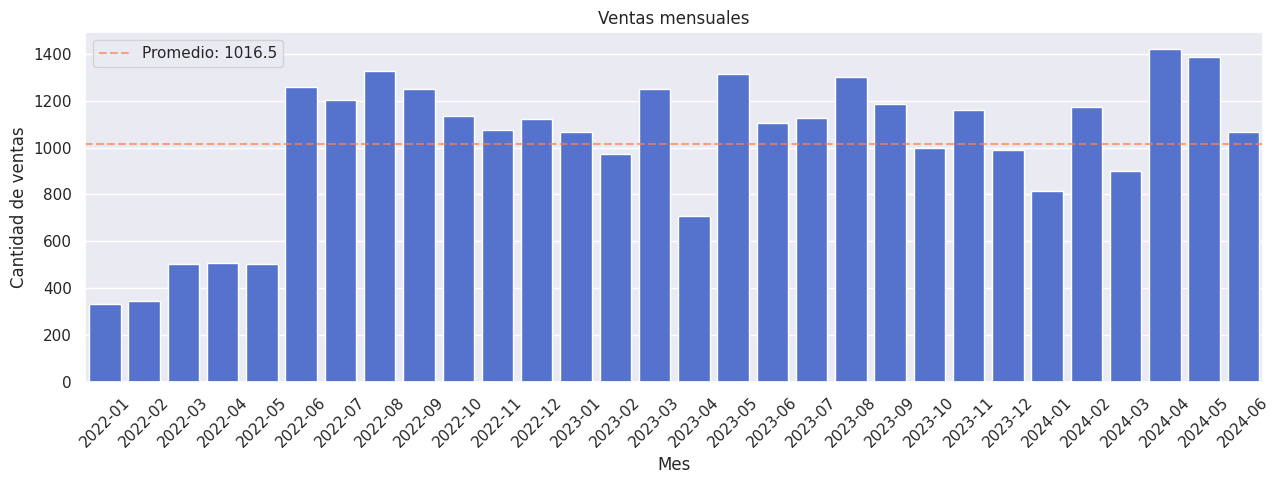

In [74]:
date_df['fecha'] = pd.to_datetime(date_df['fecha'])

# Agrupar por mes
ventas_mensuales = date_df['fecha'].dt.to_period('M').value_counts().sort_index()
ventas_mensuales.index = ventas_mensuales.index.to_timestamp()
promedio_mensual = ventas_mensuales.mean()
labels = ventas_mensuales.index.strftime('%Y-%m')

# Graficar
plt.figure(figsize=(13, 5))
ax = sns.barplot(x=labels, y=ventas_mensuales.values, color='royalblue')
plt.axhline(promedio_mensual, color='coral', linestyle='--',
            label=f'Promedio: {promedio_mensual:.1f}', alpha=0.7)
plt.title('Ventas mensuales')
plt.xlabel('Mes')
plt.ylabel('Cantidad de ventas')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

- Durante los primeros meses del período analizado (enero a mayo de 2022), el volumen de ventas fue significativamente menor en comparación con los meses posteriores.

- Se registraron caídas en el nivel de ventas en abril de 2023 y enero de 2024.

- A excepción de los primeros meses, no se evidencia una tendencia clara de crecimiento ni decrecimiento sostenido en el tiempo.

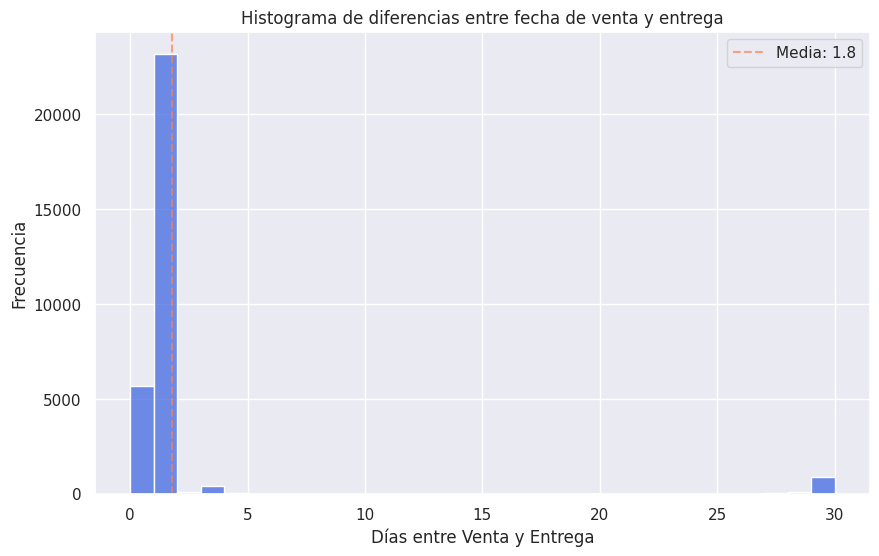

In [75]:
# Histograma de días entre venta y entrega
plt.figure(figsize=(10, 6))
sns.histplot(date_df['dias_venta_a_entrega'], bins=30, color='royalblue')
plt.title('Histograma de diferencias entre fecha de venta y entrega')
plt.axvline(date_df['dias_venta_a_entrega'].mean(), color='coral', linestyle='--', label=f'Media: {date_df["dias_venta_a_entrega"].mean():.1f}', alpha=0.7)
plt.xlabel('Días entre Venta y Entrega')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

- La gran mayoría de las ventas se entregan dentro de 1 a 2 días, mientras que un pequeño porcentaje presenta demoras excepcionales de hasta 30 días.

### 📈 2. Análisis y visualización de variables clave

🎯 **Objetivos**:
- Identificar los clientes con mayor volumen y cantidad de ventas.

- Detectar los productos más y menos vendidos.

- Analizar la evolución de ventas, cantidades y precios a lo largo del tiempo.

- Evaluar tendencias y posibles estacionalidades.

#### 🏆 2.1 Productos y Clientes Destacados

- Análisis general desde enero 2022 hasta junio 2024.

In [76]:
# Top 6 productos por cantidad
ventas_prod = (
    filtered_df
    .groupby('descrip')
    .agg({
        'canti_venta': 'sum',
    })
    .reset_index()
    .rename(columns={'canti_venta': 'ventas', 'descrip': 'producto'})
)

# Seleccionar top 6
top_productos_canti = ventas_prod.sort_values(by='ventas', ascending=False).head(6)

# Top 6 clientes por cantidad
top_clientes_canti = (
    filtered_df
    .groupby('cliente')
    .agg({'canti_venta': 'sum', 'nombre': 'first'})
    .reset_index()
    .rename(columns={'canti_venta': 'ventas'})
    .sort_values(by='ventas', ascending=False)
    .head(6)
)


In [77]:
# Graficar los top 6 productos más vendidos
fig = px.bar(
    top_productos_canti,
    x='ventas',
    y='producto',
    orientation='h',
    title='Top 6 productos más vendidos',
    labels={'ventas': 'Cantidad Vendida', 'producto': 'Producto'}
)

fig.update_layout(
    yaxis=dict(categoryorder='total ascending'),
    template='plotly_white',
    annotations=[
        dict(
            text="Período: Ene 2022 - Jun 2024",
            xref="paper", yref="paper",
            x=-0.09, y=1.14,
            showarrow=False,
            font=dict(size=12, color="gray")
        )
    ]
)

fig.show()

In [78]:
# Producto más vendido
top_product = top_productos_canti['producto'].iloc[0]
nombre_prod = top_productos_canti['producto'].iloc[0]

clientes_top_product = filtered_df[filtered_df['descrip'] == top_product]['cliente'].unique()
todos_los_clientes = filtered_df['cliente'].unique()

print(f"Producto más vendido: {nombre_prod}")
print(f"Clientes que lo compraron: {len(clientes_top_product)} de {len(todos_los_clientes)}")

Producto más vendido: mogul frutales x 1 kg.
Clientes que lo compraron: 130 de 571


In [79]:
# productos con menos ventas
productos_menos_vendidos = ventas_prod.sort_values(by='ventas', ascending=True)
productos_menos_vendidos.head(4)

,producto,ventas
23,aass gall ar + block,1.0
29,aass surt bagley,1.0
31,accion botin,1.0
58,alf aguila dor,1.0


In [80]:
# Ver productos con al menos 5 ventas
productos_menos_vendidos = ventas_prod[ventas_prod['ventas'] >= 5].sort_values(by='ventas', ascending=True)
productos_menos_vendidos.head(4)

,producto,ventas
3681,torta chips aguila,5.0
3682,torta chps aguila,5.0
97,alf minitorta coco,5.0
3668,topline tab sandia,5.0


🔍 **Observaciones**

- El **producto más vendido** es Mogul Frutales x 1kg, adquirido por 130 de 571 clientes (~23%).

- Los **productos más vendidos** son principalmente golosinas, caramelos, alfajores y turrones.

- Hay productos con una sola venta, podrían excluirse de sistemas de recomendación.

- Para evitar que los **productos menos vendidos** se correspondan a productos sin estandarización, se podría repetir este análisis después de la curación.

In [81]:
# Datos agrupados por cliente
clientes_agg = (
    filtered_df.groupby('cliente')
    .agg({
        'nombre': lambda x: x.mode().iloc[0],   # persona con más ventas
        'precio_total': 'sum',                  # facturación total
        'canti_venta': 'sum',                   # cantidad de productos vendidos
        'canti': 'sum',                         # cantidad de unidades vendias
        'factu_nume': 'nunique'                 # cantidad de facturas
    })
    .assign(nombre_cliente=lambda df: df['nombre'] + ' (' + df.index.astype(str) + ')')
    .reset_index()
).rename(columns={
    'precio_total': 'facturacion_total',
    'canti_venta': 'cantidad_productos_vendidos',
    'canti': 'cantidad_unidades_vendidas',
    'factu_nume': 'cantidad_facturas',
})

top_clientes_fact = clientes_agg.sort_values(by='facturacion_total', ascending=False).head(6)
top_clientes_canti = clientes_agg.sort_values(by='cantidad_productos_vendidos', ascending=False).head(6)

top_clientes_fact['facturacion_millones'] = top_clientes_fact['facturacion_total'] / 1_000_000

In [82]:
# Crear figura con subplots
fig = make_subplots(
    rows=2, cols=1,
    shared_xaxes=False,
    vertical_spacing=0.15,
    subplot_titles=(
        "Top 6 Clientes por Facturación",
        "Top 6 Clientes por Cantidad de Productos Vendidos"
    )
)

# Gráfico 1: Facturación
fig.add_trace(
    go.Bar(
        x=top_clientes_fact['facturacion_millones'],
        y=top_clientes_fact['nombre_cliente'],
        orientation='h',
        marker_color='royalblue',
        name='Facturación'
    ),
    row=1, col=1
)

# Gráfico 2: Cantidad de ventas
fig.add_trace(
    go.Bar(
        x=top_clientes_canti['cantidad_productos_vendidos'],
        y=top_clientes_canti['nombre_cliente'],
        orientation='h',
        marker_color='seagreen',
        name='Productos Vendidos'
    ),
    row=2, col=1
)

fig.update_layout(
    height=700,
    title_text="🏆 Top Clientes",
    showlegend=False,
    template='plotly_white'
)

fig.add_annotation(
    text="Período: Ene 2022 - Jun 2024",
    xref="paper", yref="paper",
    x=-0.12, y=1.08,
    showarrow=False,
    font=dict(size=12, color="gray")
)

fig.update_xaxes(title_text="Facturación (millones de pesos)", row=1, col=1)
fig.update_xaxes(title_text="Cantidad de Productos Vendidos", row=2, col=1)

fig.update_yaxes(categoryorder='total ascending', row=1, col=1)
fig.update_yaxes(categoryorder='total ascending', row=2, col=1)

fig.show()


- Sólo 1 de los 6 clientes con mayor facturación también están entre los que más productos venden.

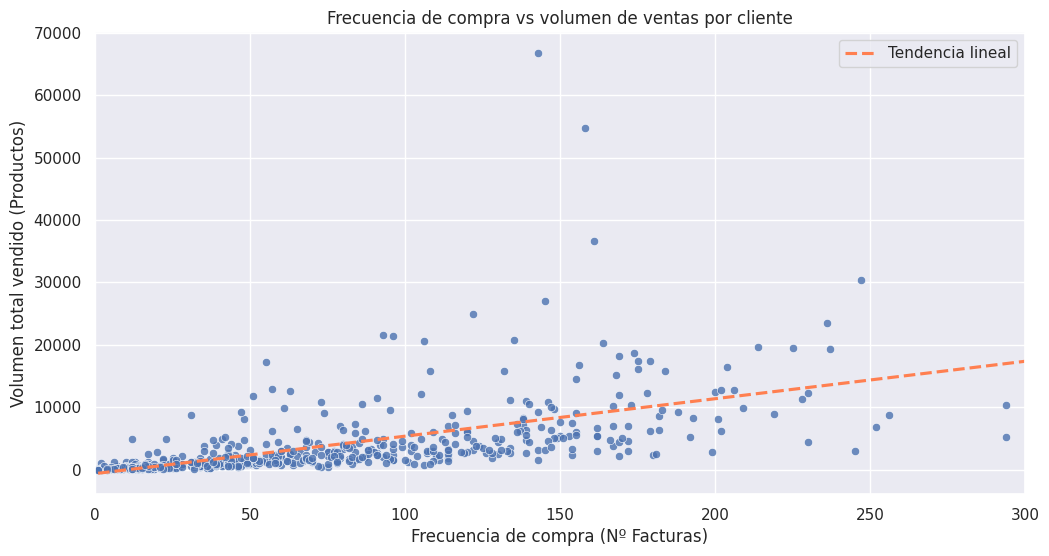

In [83]:
plt.figure(figsize=(12, 6))

sns.regplot(
    data=clientes_agg,
    x='cantidad_facturas',
    y='cantidad_productos_vendidos',
    scatter_kws={
        'alpha': 0.8,
        'edgecolor': 'white',
        'linewidths': 0.5,
        'label': 'Clientes'
    },
    line_kws={
        'color': 'coral',
        'linestyle': '--',
        'label': 'Tendencia lineal',
    },
    ci=None
)

plt.title('Frecuencia de compra vs volumen de ventas por cliente')
plt.xlabel('Frecuencia de compra (Nº Facturas)')
plt.ylabel('Volumen total vendido (Productos)')
plt.xlim(0, 300)
plt.legend()
plt.show()

- Se observa una clara **tendencia positiva** entre la frecuencia de compra y el volumen de ventas, lo cual es esperable, ya que los clientes que compran más seguido suelen generar mayores ingresos.

- Hay una alta concentración de clientes con pocas compras, y algunos casos de alto volumen con baja frecuencia, es decir, pocas compras grandes.

#### 💲 2.2 Evolución temporal de precios, ventas y clientes

In [84]:
filtered_df['fecha_dt'] = pd.to_datetime(filtered_df['fecha'])
# Primer día del mes como timestamp
filtered_df['mes_p'] = filtered_df['fecha_dt'].dt.to_period('M').dt.to_timestamp()

# Agregación mensual
ventas_mensuales = (
    filtered_df.groupby(filtered_df['fecha_dt'].dt.to_period('M'))['canti_venta'].sum().to_timestamp()
)

In [85]:
# Calcular precio unitario promedio semanal
precio_semanal = (
    filtered_df.groupby(filtered_df['fecha_dt'].dt.to_period('W'))['precio_uni']
    .mean()
    .reset_index()
)
precio_semanal['fecha'] = precio_semanal['fecha_dt'].dt.to_timestamp()
precio_semanal = precio_semanal.rename(columns={'precio_uni': 'precio_unitario'})

# Graficar con plotly
fig = px.line(
    precio_semanal,
    x='fecha',
    y='precio_unitario',
    title='Precio Unitario Promedio Semanal',
    labels={'fecha': 'Semana', 'precio_unitario': 'Precio Unitario Promedio'}
)
fig.update_layout(template='plotly_white', height=450)
fig.show()

🔍 **Observaciones**:

- Se observa un crecimiento sostenido en los precios hasta 2024, seguido de un fuerte incremento a partir de enero de ese año.

- La marcada suba de precios indica la necesidad de actualizar los valores según la inflación, para poder predecir con mayor precisión tendencias y comportamientos de compra.

In [86]:
# Volumen total mensual
volumen_mensual_total = (
    filtered_df
    .groupby('mes_p')['canti_venta']
    .sum()
    .reset_index(name='volumen_total')
)

# Top 5 clientes por volumen de ventas
top_5_clientes = top_clientes_canti.head(5).copy()

# Filtrar dataset con esos clientes
top_df = filtered_df[filtered_df['cliente'].isin(top_5_clientes['cliente'])]

# Agrupar por mes y cliente
volumen_por_cliente = (
    top_df
    .groupby(['mes_p', 'cliente'])['canti_venta']
    .sum()
    .reset_index()
)

# Diccionario de nombres
cliente_nombres = dict(zip(top_5_clientes['cliente'], top_5_clientes['nombre']))

# --- Crear figura ---
fig = make_subplots(
    rows=2, cols=5,
    specs=[
        [{'colspan': 5}, None, None, None, None],
        [{}, {}, {}, {}, {}]
    ],
    shared_xaxes=False,
    vertical_spacing=0.1,
    subplot_titles=["Volumen mensual total (todos los clientes)"] +
                   [f"🔹 {cliente_nombres[c]}" for c in top_5_clientes['cliente']]
)

# --- Gráfico general ---
fig.add_trace(
    go.Scatter(
        x=volumen_mensual_total['mes_p'],
        y=volumen_mensual_total['volumen_total'],
        mode='lines+markers',
        name='Total general',
        line=dict(color='royalblue')
    ),
    row=1, col=1
)

# --- Gráficos individuales ---
for i, cliente in enumerate(top_5_clientes['cliente']):
    data_cliente = volumen_por_cliente[volumen_por_cliente['cliente'] == cliente]
    fig.add_trace(
        go.Scatter(
            x=data_cliente['mes_p'],
            y=data_cliente['canti_venta'],
            mode='lines+markers',
            name=cliente_nombres[cliente],
            line=dict(width=2)
        ),
        row=2, col=i+1
    )

# --- Layout ---
fig.update_layout(
    height=700,
    width=1250,
    title_text='Evolución Mensual del Volumen Promedio de Ventas',
    showlegend=False,
    template='plotly_white',
    margin=dict(t=60)
)

# Ejes
fig.update_xaxes(title_text="Mes", row=2)
fig.update_yaxes(title_text="Volumen total", row=1, col=1)
for i in range(1, 6):
    fig.update_yaxes(title_text="Volumen", row=2, col=i)

fig.show()

🔍 **Observaciones**:
1. Generales:
    - **Pico destacado en julio de 2022**, donde el volumen total de ventas alcanza su máximo (~145k).

    - A partir de **2023**, el volumen muestra mayor estabilidad pero con una **tendencia levemente descendente**.

    - Se observa una **caída marcada a inicios de 2024**, posiblemente vinculada al impacto de aumentos de precios por inflación, lo cual podría haber afectado la demanda.

2. Por cliente:
    - Incluso entre los principales compradores, **la actividad mensual es muy irregular**: no todos realizan compras todos los meses y el volumen varía significativamente.

    - Esto sugiere que una granularidad mensual podría no ser adecuada para predecir el comportamiento individual, y que tal vez sea necesario agrupar en períodos más amplios (como trimestres) para captar patrones más estables.

In [87]:
# Contar clientes activos únicos por mes
clientes_por_mes = (
    filtered_df.groupby('mes_p')['cliente']
    .nunique()
    .reset_index(name='clientes_activos')
)

# Calcular promedio mensual de clientes activos
promedio_clientes = clientes_por_mes['clientes_activos'].mean()

# Graficar
fig = px.line(
    clientes_por_mes,
    x='mes_p',
    y='clientes_activos',
    markers=True,
    title='Clientes Activos por Mes',
    labels={'clientes_activos': 'Clientes activos únicos', 'mes_p': 'Mes'},
)

# Agregar línea de promedio horizontal
fig.add_hline(
    y=promedio_clientes,
    line_dash='dash',
    line_color='gray',
    annotation_text=f'Promedio: {promedio_clientes:.1f}',
    annotation_position='top right'
)

fig.update_layout(template='plotly_white', height=450)
fig.show()

- En 2022 se registró la mayor cantidad de clientes, seguida de una disminución significativa a partir de enero de 2023.

- Hay una caída notable en clientes activos a principios de 2024, después de la caída la cantidad de clientes activos se recupera parcialmente.

#### 📆 2.3 Tendencias y estacionalidades

In [88]:
# Agregar columnas de dia, mes y año
filtered_df['nombre_dia'] = filtered_df['fecha'].dt.day_name()
filtered_df['nombre_mes'] = filtered_df['fecha'].dt.month_name()
# Agregar columnas de mes y año
filtered_df['mes'] = filtered_df['fecha_dt'].dt.month
filtered_df['año'] = filtered_df['fecha_dt'].dt.year

# Orden para gráficos
orden_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
orden_meses = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

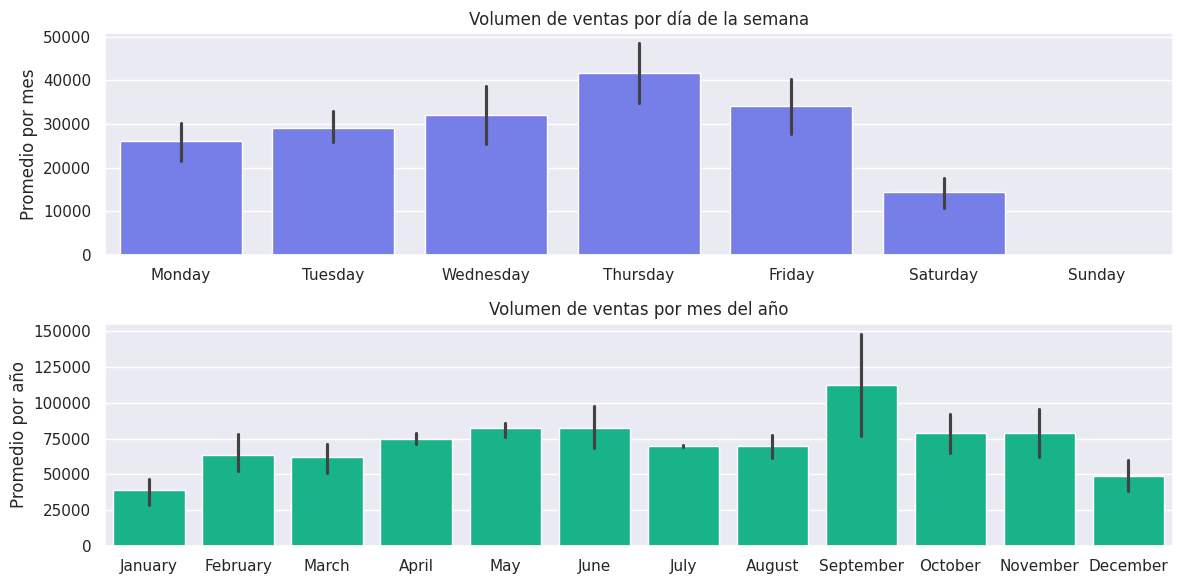

In [89]:
plt.figure(figsize=(12, 6))

# --- Promedio por día de la semana ---
plt.subplot(2, 1, 1)
sns.barplot(
    data=filtered_df.groupby(['mes', 'nombre_dia'])['canti_venta'].sum().reset_index(),
    x='nombre_dia',
    y='canti_venta',
    estimator='mean',
    order=orden_dias,
    color='#636EFA'
)
plt.title('Volumen de ventas por día de la semana')
plt.xlabel('')
plt.ylabel('Promedio por mes')

# --- Promedio por mes del año ---
plt.subplot(2, 1, 2)
sns.barplot(
    data=filtered_df.groupby(['año', 'nombre_mes'])['canti_venta'].sum().reset_index(),
    x='nombre_mes',
    y='canti_venta',
    estimator='mean',
    order=orden_meses,
    color='#00CC96'
)
plt.title('Volumen de ventas por mes del año')
plt.xlabel('')
plt.ylabel('Promedio por año')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

🔍 **Observaciones**:

- Jueves es el día con mayor volumen promedio de ventas, fines de semana bajan notablemente, y los domingos no se registran ventas.

- Septiembre concentra el mayor volumen de ventas (pero alta variabilidad), mientras que enero y diciembre presentan los niveles más bajos de ventas.

✅ Las diferencias claras entre meses y días de la semana muestran patrones regulares de comportamiento, lo que puede ayudar a anticipar mejor las ventas en distintos momentos del año.

In [90]:
# Agrupar por año y mes
seasonal = filtered_df.groupby(['año', 'mes'])['canti_venta'].sum().reset_index()

fig = px.line(seasonal, x='mes', y='canti_venta', color='año',
              labels={'mes': 'Mes', 'canti_venta': 'Ventas'},
              title='Gráfico estacional: ventas por mes, comparadas por año')
fig.show()

🔍 **Observaciones**:

- **Patrón estacional claro**: todos los años muestran un crecimiento entre enero y junio, caída en julio-agosto y un pico en septiembre, especialmente en 2022.

- **Meses de baja actividad**: diciembre y enero tienden a mostrar valores más bajos, lo que podría estar relacionado con estacionalidad comercial o recesos.

### 🕒 3. Análisis de granularidad temporal

🎯 **Objetivos**:

- Evaluar variabilidad y ruido de los datos al agruparlos con diferentes granularidades temporales.

- Analizar el grado de completitud de las series de tiempo según la granularidad elegida.

Para medir la variabilidad de las series se puede usar el **coeficiente de variación por cliente**, ya que es independiente del volumen de ventas. Promediarlo permite evaluar cómo cambia la variabilidad al modificar la granularidad.

In [91]:
def coeficiente_variacion_por_granularidad(df, col_fecha, col_cliente, col_ventas, granularidades):
    resultados = []

    for gr in granularidades:
        df['periodo'] = df[col_fecha].dt.to_period(gr)

        # Agrupar por cliente y periodo, sumando ventas
        resumen = df.groupby([col_cliente, 'periodo'])[col_ventas].sum().reset_index()

        # Calcular media y std por cliente
        stats = resumen.groupby(col_cliente)[col_ventas].agg(['mean', 'std'])

        # Calcular coeficiente de variación (evitar división por cero)
        stats = stats[stats['mean'] > 0]
        stats['cv'] = stats['std'] / stats['mean']

        # Promediar el CV entre todos los clientes
        promedio_cv = stats['cv'].mean()

        resultados.append({
            'granularidad': gr,
            'clientes': stats.shape[0],
            'promedio_cv': round(promedio_cv, 4)
        })

    return pd.DataFrame(resultados)

granularidades = ['D', 'W', 'M', 'Q']  # Días, Semanas, Meses, Trimestres
cv_resultados = coeficiente_variacion_por_granularidad(
    filtered_df,
    col_fecha='fecha_dt',
    col_cliente='cliente',
    col_ventas='canti_venta',
    granularidades=granularidades
)
cv_resultados.sort_values(by='promedio_cv', ascending=False, inplace=True)
cv_resultados

,granularidad,clientes,promedio_cv
0,D,571,1.0673
1,W,571,1.0039
2,M,571,0.7871
3,Q,571,0.6023


- Tanto la granularidad diaria como la semanal presentan alta variabilidad, es recomendable utilizar una granularidad **mensual o trimestral**.

In [92]:
# Granularidad para los 5 clientes con más ventas
fig = make_subplots(
    rows=2, cols=5,
    subplot_titles=[f"Cliente {c}" for c in top_clientes_canti['cliente'].head(5)],
    vertical_spacing=0.15,
    shared_yaxes=True,
    row_titles=['Mensual', 'Trimestral']
)

def agregar_traza(df, cliente, freq, row, col):
    serie = df[df['cliente'] == cliente].groupby(df['fecha_dt'].dt.to_period(freq))['canti_venta'].sum()
    fig.add_trace(
        go.Scatter(
            x=serie.index.to_timestamp(),
            y=serie.values,
            mode='lines+markers',
            showlegend=False
        ),
        row=row, col=col
    )

for row, freq in zip([1, 2], ['M', 'Q']):
    for col, cliente in enumerate(top_clientes_canti['cliente'].head(5), start=1):
        agregar_traza(top_df, cliente, freq, row, col)

fig.update_layout(
    height=600, width=1200,
    title_text='Ventas por Cliente: Agrupación Mensual vs Trimestral<br>Top 5 clientes en ventas',
    template='plotly_white',
    margin=dict(t=130),
)


for row in [1, 2]:
    for col in range(1, 6):
        fig.update_xaxes(title_text='Fecha', row=row, col=col)
fig.update_yaxes(title_text='Cantidad vendida', row=1, col=1)
fig.update_yaxes(title_text='Cantidad vendida', row=2, col=1)

fig.show()

- En clientes con mayor volumen de ventas, la granularidad trimestral capta bien la tendencia general y reduce outliers. En clientes con menor frecuencia de compra, esta diferencia sería probablemente más marcada.

- Se podrían considerar dos enfoques:

    - Usar directamente una **granularidad trimestral**.

    - Aplicar **suavizadores** más sofisticados **sobre la serie mensual** para intentar preservar mayor nivel de detalle.

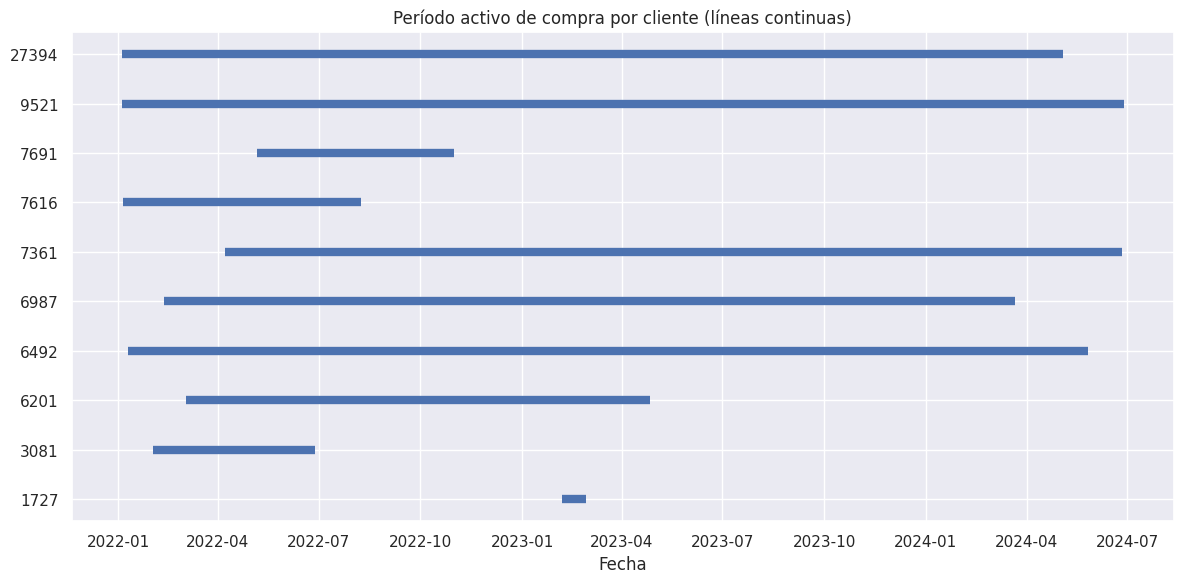

In [93]:
# Selección aleatoria de 10 clientes
clientes_sample = filtered_df['cliente'].drop_duplicates().sample(10, random_state=1)
df_sample = filtered_df[filtered_df['cliente'].isin(clientes_sample)]

# Calcular inicio y fin del período activo de cada cliente
periodos = df_sample.groupby('cliente')['fecha'].agg(['min', 'max']).reset_index()
periodos.columns = ['cliente', 'inicio', 'fin']

# Gráfico de líneas horizontales por cliente
fig, ax = plt.subplots(figsize=(12, 6))

for i, row in periodos.iterrows():
    ax.hlines(y=i, xmin=row['inicio'], xmax=row['fin'], linewidth=6, label=row['cliente'])

# Configurar etiquetas y estilo
ax.set_yticks(range(len(periodos)))
ax.set_yticklabels(periodos['cliente'])
ax.set_xlabel("Fecha")
ax.set_title("Período activo de compra por cliente (líneas continuas)")
plt.grid(True)
plt.tight_layout()
plt.show()

🔍 **Observaciones**:

- De los 10 clientes seleccionados al azar, se observa que algunos tienen actividad casi continua desde el inicio hasta el final del rango temporal, mientras que otros presentan períodos activos mucho más cortos.

- No todos los clientes tienen registros en el mismo rango de fechas, ya que algunos comenzaron a comprar más tarde. Esto debe considerarse al aplicar modelos de predicción. Según el modelo, hay varias estrategias posibles:

    - **Imputar con 0**: asume que el cliente no realizaba compras antes de su primera aparición.

    - **Usar NaN** si el modelo lo permite, refleja ausencia de información previa.

    - **Ajustar la ventana temporal**: entrenar cada cliente solo desde su primer registro si el modelo admite secuencias de longitud variable.

In [94]:
print('Análisis de granularidad para diferentes periodos de tiempo y su % de series de tiempo vacias')
print('--------------------------------------------------------------------------------------------')
def evaluar_granularidad(df, col_fecha, col_cliente, granularidades):
    resultados = []

    for gr in granularidades:
        # Convertir fechas al período correspondiente
        df['periodo'] = df[col_fecha].dt.to_period(gr)

        # Calcular rango global del dataset
        periodo_min = df['periodo'].min()
        periodo_max = df['periodo'].max()
        todos_los_periodos = pd.period_range(start=periodo_min, end=periodo_max, freq=gr)

        # Calcular rango de actividad por cliente
        rangos = df.groupby(col_cliente)['periodo'].agg(['min', 'max'])

        # Crear matriz cliente x periodo
        matriz = df.groupby([col_cliente, 'periodo']).size().unstack(fill_value=0)

        # --- Porcentaje solo períodos activos por cliente ---
        total_celdas_ajustadas = 0
        celdas_activas_ajustadas = 0

        for cliente in matriz.index:
            inicio = rangos.loc[cliente, 'min']
            fin = rangos.loc[cliente, 'max']

            periodos_cliente = pd.period_range(start=inicio, end=fin, freq=gr)
            periodos_presentes = [p for p in periodos_cliente if p in matriz.columns]

            total_celdas_ajustadas += len(periodos_presentes)
            celdas_activas_ajustadas += matriz.loc[cliente, periodos_presentes].gt(0).sum()

        porcentaje_vacio_ajustado = (total_celdas_ajustadas - celdas_activas_ajustadas) / total_celdas_ajustadas * 100

        # --- Porcentaje considerando todo el rango del dataset
        total_celdas_completas = len(matriz.index) * len(todos_los_periodos)
        celdas_activas_completas = (matriz > 0).sum().sum()
        porcentaje_vacio_completo = (total_celdas_completas - celdas_activas_completas) / total_celdas_completas * 100

        # Guardar resultados
        resultados.append({
            'granularidad': gr,
            'periodos_totales': len(todos_los_periodos),
            'porcentaje_vacio_ajustado': round(porcentaje_vacio_ajustado, 2),
            'porcentaje_vacio_completo': round(porcentaje_vacio_completo, 2)
        })

    return pd.DataFrame(resultados)

granularidades = ['D', 'W', 'M', 'Q', 'Y']  # Día, Semana, Mes, Trimestre, Año
resultado = evaluar_granularidad(filtered_df, 'fecha', 'cliente', granularidades)
resultado

Análisis de granularidad para diferentes periodos de tiempo y su % de series de tiempo vacias
--------------------------------------------------------------------------------------------


,granularidad,periodos_totales,porcentaje_vacio_ajustado,porcentaje_vacio_completo
0,D,909,86.84,92.87
1,W,130,39.95,59.74
2,M,30,6.82,36.10
3,Q,10,0.93,29.21
4,Y,3,0.00,21.19


🔍 **Observaciones**:
- El porcentaje ajustado calcula la cantidad de series temporales incompletas considerando únicamente el intervalo de actividad de cada cliente, es decir, desde su primera hasta su última compra.

- En cambio, el porcentaje completo se calcula sobre todo el rango temporal del dataset, sin tener en cuenta cuándo comenzó a comprar cada cliente.

- En ambos casos, tanto la granularidad diaria como la semanal presentan un alto porcentaje de series temporales incompletas. Al usar una granularidad mensual, el porcentaje disminuye considerablemente y se estabiliza en valores similares a la granularidad trimestral.

### 4. 💡 Observaciones para la limpieza y curación de datos

Algunas observaciones clave para la etapa de curación:

- **Imputar** valores faltantes en `depo` y `factu_nume` con las relaciones entre columnas encontradas.

- **Estandarizar** descripciones y códigos de productos para mejorar la calidad de los datos, esto podría mejorar el rendimiento del modelo.

- **Ajustar** precios según el índice de inflación.

- **Tratar** series temporales incompletas, tanto por valores faltantes intermedios como por inicio tardío de actividad del cliente.